In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties as un
from uncertainties import ufloat
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [3]:
# Uncertainty in distance (meters)
dist_uncert = 0.05
# uncertainty in time (s)
time_uncert = 4e-9

In [4]:
def linearFit(t, m, b): 
    return m*t + b

#defines linear fit function

In [5]:
data = np.genfromtxt('../data/rawData.csv', delimiter = ',', skip_header=True)
#imports data from text file

In [6]:
print(data)

[[  1.06854000e+02   3.68000000e-07]
 [  9.68540000e+01   3.40000000e-07]
 [  8.68540000e+01   3.16000000e-07]
 [  7.68540000e+01   3.00000000e-07]
 [  6.60000000e+01   2.78000000e-07]
 [  5.60000000e+01   2.60000000e-07]
 [  4.60000000e+01   2.40000000e-07]
 [  3.60000000e+01   2.18000000e-07]
 [  2.60000000e+01   1.98000000e-07]
 [  1.60000000e+01   1.80000000e-07]
 [  6.00000000e+00   1.68000000e-07]]


In [7]:
xInFeet = data[ :, 0]
tInNs = data[ :, 1]
dx = [] #total change in distance travelled by the light in meters
dt = [] #change in time

In [8]:
i = 0
for i in range(len(xInFeet)):
    dx.append(2*0.3048*(xInFeet[i]-xInFeet[10]))
print (dx)
# calculates the total change in distance (twice the mirror's change) and converts it to meters

[61.480598400000005, 55.384598400000002, 49.288598400000005, 43.192598400000001, 36.576000000000001, 30.48, 24.384, 18.288, 12.192, 6.0960000000000001, 0.0]


In [9]:
j = 0
for j in range(len(tInNs)):
    dt.append(tInNs[j]-tInNs[10])
print (dt)
#calculates the change in time

[2.0000000000000002e-07, 1.7199999999999998e-07, 1.4800000000000003e-07, 1.3199999999999999e-07, 1.0999999999999998e-07, 9.2000000000000003e-08, 7.1999999999999983e-08, 4.9999999999999998e-08, 3.0000000000000004e-08, 1.2000000000000002e-08, 0.0]


In [18]:
dx_wi_uncert = [ufloat(val, dist_uncert, "dx") for val in dx]
dt_wi_uncert = [ufloat(val, time_uncert, "dt") for val in dt]

dx = np.array(dx)
dt = np.array(dt)
#transforms dx and dt from lists into arrays

Uncertainties: $\Delta x = \pm 0.04m$, $\Delta t = \pm 4 ns$

$c = \frac{dx}{dt}$

$\Delta c = \sqrt{(\frac{\partial c}{\partial x}\Delta x)^2 + (\frac{\partial c}{\partial t}\Delta t)^2}$

$\Delta c = \sqrt{(\frac{1}{t}0.04)^2 + (-xt^{-2}4\times10^{-9})^2}$

In [11]:
uncertaintyInC = []

In [12]:
k=0
for k in range(len(dx)-1):
    uncertaintyInC.append(np.sqrt(((0.05/dt[k])**2)+((dx[k]*dt[k])**(-2)*4*10**(-9))**2))
    k+=1
print(uncertaintyInC)

[250000.00139983758, 290697.67776039039, 337837.84620058478, 378787.8987754882, 454545.52171262621, 543478.49893511552, 694445.65700187022, 1000011.443072055, 1666934.8436267867, 4233185.3326617274]


In [13]:
dc = np.average(uncertaintyInC)
print("{:.3e}".format(dc)) #this gives our average uncertainty of the speed of light)

9.850e+05


In [15]:
fitParams, fitCovariances = curve_fit(linearFit, dt, dx)
print(fitParams)
print(fitCovariances)

[  3.07631078e+08   2.19945059e+00]
[[  3.52308043e+13  -3.26045077e+06]
 [ -3.26045077e+06   4.42639779e-01]]


In [16]:
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1]])

In [75]:
x_err = 0
t_err = 0
for (num,err) in c.error_components().items():
    if num.tag is "dx":
        x_err = err
    else:
        t_err = err
        
print("dx = {:.1e} dt = {:.6e}".format(x_err, t_err))

dx = 2.5e+05 dt = 6.148060e+06


In [99]:
change_in_x = dx_wi_uncert[0]-dx_wi_uncert[10]
change_in_t = dt_wi_uncert[0]-dt_wi_uncert[10]
c = change_in_x/change_in_t
print("{:.5}".format(c))
print("c_best = {:.3}".format(c.n))
print("c_err = {:.3}".format(c.s))
print("frac uncert = {}".format(c.s/c.n))
print("range = {} -- {}".format((c.n*(1 - c.s/c.n)),(c.n*(1 + c.s/c.n))))

(3.0740+/-0.0870)e+08
c_best = 3.07e+08
c_err = 8.7e+06
frac uncert = 0.028307645591300036
range = 298701137.04875875 -- 316104846.95124125


/Users/samuelbphotos/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


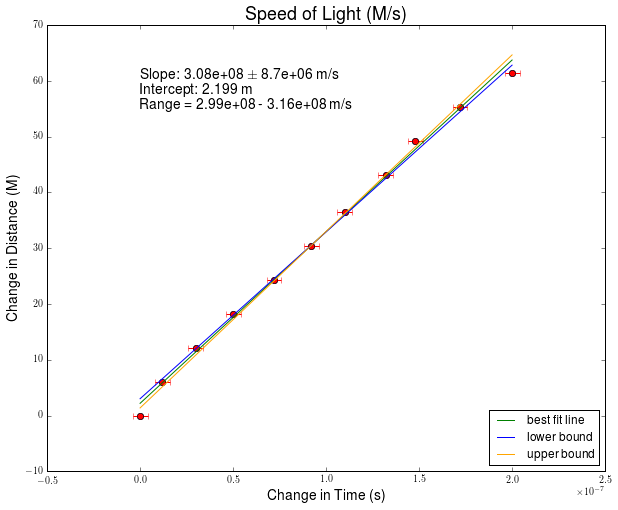

In [105]:
min_slope = (fitParams[0]-c.s)
max_slope = (fitParams[0]+c.s)

lin_space_t = np.linspace(dt.min(), dt.max(), 100)

plt.plot (dt, dx, 'o')
plt.errorbar(dt, dx, fmt = 'ro', xerr=0.000000004, yerr = .05)
plt.xlabel('Change in Time (s)', fontsize = 14)
plt.ylabel('Change in Distance (M)', fontsize = 14)
plt.title('Speed of Light (M/s)', fontsize = 18)
plt.plot(dt, linearFit(dt, fitParams[0], fitParams[1]), label='best fit line')
plt.plot(lin_space_t, linearFit(lin_space_t, min_slope, 11/8*fitParams[1]), 'b', label='lower bound')
plt.plot(lin_space_t, linearFit(lin_space_t, max_slope, 5/8*fitParams[1]), color='orange', label='upper bound')
plt.text(0, 55,"Slope: {:.2e}".format(fitParams[0])+r' $\pm$'+" {:.1e} m/s".format(c.s)+
         "\nIntercept: {:.4} m".format(fitParams[1])+
         "\nRange = {:.2e} - {:.2e} m/s".format(min_slope, max_slope), fontsize=14)
plt.legend(bbox_to_anchor=(1,0.15))
plt.savefig('../images/analysis.png', dpi=300)
plt.show()